In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/10 May 2024 -- Data Science Project /heart_attack_prediction_dataset.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df.shape

(8763, 26)

In [ ]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
df.drop_duplicates().shape

(8763, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
drop_columns = ['Patient ID','Continent', 'Hemisphere']
df.drop(drop_columns,axis=1,inplace=True)
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,Argentina,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Canada,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,France,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,Canada,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0


In [ ]:
df.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Heart Attack Risk                  0
dtype: int64

In [ ]:
df['Age'].unique()

array([67, 21, 84, 66, 54, 90, 20, 43, 73, 71, 77, 60, 88, 69, 38, 50, 45,
       36, 48, 40, 79, 63, 27, 25, 86, 42, 52, 29, 30, 47, 44, 33, 51, 70,
       85, 31, 56, 24, 74, 72, 55, 26, 53, 46, 57, 22, 35, 39, 80, 65, 83,
       82, 28, 19, 75, 18, 34, 37, 89, 32, 49, 23, 59, 62, 64, 61, 76, 41,
       87, 81, 58, 78, 68])

In [ ]:
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df = pd.get_dummies(df,columns=['Sex'],drop_first=True)
df.rename(columns={'Sex_Male':'Gender'},inplace= True)

df['Gender'] = df['Gender'].astype(int)

df.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender
0,67,208,158/88,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,Argentina,0,1
1,21,389,165/93,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,Canada,0,1
2,21,324,174/99,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,France,0,0
3,84,383,163/100,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,Canada,0,1
4,66,318,91/88,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,Thailand,0,1


In [ ]:
df['Cholesterol'].unique()

array([208, 389, 324, 383, 318, 297, 358, 220, 145, 248, 373, 374, 228,
       259, 122, 379, 166, 303, 340, 294, 359, 202, 133, 159, 271, 273,
       328, 154, 135, 197, 321, 375, 360, 263, 201, 347, 129, 229, 251,
       121, 190, 185, 279, 336, 192, 180, 203, 368, 222, 243, 218, 120,
       285, 377, 369, 311, 139, 266, 153, 339, 329, 333, 398, 124, 183,
       163, 362, 390, 200, 396, 255, 209, 247, 250, 227, 246, 223, 330,
       195, 194, 178, 155, 240, 237, 216, 276, 224, 326, 198, 301, 314,
       304, 334, 213, 254, 230, 316, 277, 388, 206, 384, 205, 261, 308,
       338, 382, 291, 168, 171, 378, 253, 245, 226, 281, 123, 173, 231,
       234, 268, 306, 186, 293, 161, 380, 239, 149, 320, 219, 335, 265,
       126, 307, 270, 225, 193, 148, 296, 136, 364, 353, 252, 232, 387,
       299, 357, 214, 370, 345, 351, 344, 152, 150, 131, 272, 302, 337,
       170, 356, 274, 188, 125, 138, 376, 181, 184, 275, 394, 128, 217,
       399, 283, 289, 284, 327, 262, 212, 350, 385, 162, 141, 36

In [ ]:
df['Blood Pressure'].unique()

array(['158/88', '165/93', '174/99', ..., '137/94', '94/76', '119/67'],
      dtype=object)

In [ ]:
def handle_blood_pressure_systolic(value):
  value = str(value)
  value = value.split('/')
  return int(value[0])

def handle_blood_pressure_diastolic(value):
  value = str(value)
  value = value.split('/')
  return int(value[1])

df['Systolic Pressure'] = df['Blood Pressure'].apply(handle_blood_pressure_systolic)
df['Diastolic Pressure'] = df['Blood Pressure'].apply(handle_blood_pressure_diastolic)

df.drop(columns=['Blood Pressure'],axis=1,inplace = True)

df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender,Systolic Pressure,Diastolic Pressure
0,67,208,72,0,0,1,0,0,4.168189,Average,...,261404,31.251233,286,0,6,Argentina,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,285768,27.194973,235,1,7,Canada,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,235282,28.176571,587,4,4,France,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,Average,...,125640,36.464704,378,3,4,Canada,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,160555,21.809144,231,1,5,Thailand,0,1,91,88


In [ ]:
df['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [ ]:
def handle_diet(value):
  value = str(value)

  if value == 'Unhealthy':
    return 0
  elif value == 'Average':
    return 1
  elif value == 'Healthy':
    return 2
  else:
    return np.nan

df['Diet'] = df['Diet'].apply(handle_diet)
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender,Systolic Pressure,Diastolic Pressure
0,67,208,72,0,0,1,0,0,4.168189,1,...,261404,31.251233,286,0,6,Argentina,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,0,...,285768,27.194973,235,1,7,Canada,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,2,...,235282,28.176571,587,4,4,France,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,1,...,125640,36.464704,378,3,4,Canada,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,0,...,160555,21.809144,231,1,5,Thailand,0,1,91,88


In [ ]:
df['Country'].unique()

array(['Argentina', 'Canada', 'France', 'Thailand', 'Germany', 'Japan',
       'Brazil', 'South Africa', 'United States', 'Vietnam', 'China',
       'Italy', 'Spain', 'India', 'Nigeria', 'New Zealand', 'South Korea',
       'Australia', 'Colombia', 'United Kingdom'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

In [ ]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender,Systolic Pressure,Diastolic Pressure
0,67,208,72,0,0,1,0,0,4.168189,1,...,261404,31.251233,286,0,6,0,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,0,...,285768,27.194973,235,1,7,3,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,2,...,235282,28.176571,587,4,4,6,0,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,1,...,125640,36.464704,378,3,4,3,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,0,...,160555,21.809144,231,1,5,16,0,1,91,88


In [ ]:
columns_name = ['Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day']

for col in columns_name:
  unique_values = df[col].unique()
  print(f"Unique values in '{col}' column: {unique_values}")

Unique values in 'Heart Rate' column: [ 72  98  73  93  48  84 107  68  55  97  70  85 102  40  56 104  71  69
  66  81  52 105  96  74  49  45  50  46  44 106  83  86  65 101  51  43
  79  90  94  78  92  54 109  61  64  82 110  42  63  41 100  76  75  58
  53  60  77  47  59  57  87  67  88  99  80  95 108  89  62 103  91]
Unique values in 'Diabetes' column: [0 1]
Unique values in 'Family History' column: [0 1]
Unique values in 'Smoking' column: [1 0]
Unique values in 'Obesity' column: [0 1]
Unique values in 'Alcohol Consumption' column: [0 1]
Unique values in 'Exercise Hours Per Week' column: [ 4.16818884  1.81324162  2.07835299 ...  3.14843791  3.78994983
 18.08174797]
Unique values in 'Previous Heart Problems' column: [0 1]
Unique values in 'Medication Use' column: [0 1]
Unique values in 'Stress Level' column: [ 9  1  6  2  7  4  5  8 10  3]
Unique values in 'Sedentary Hours Per Day' column: [6.61500145 4.96345884 9.46342584 ... 2.37521373 0.02910426 9.00523438]
Unique values in '

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Diet                             8763 non-null   int64  
 10  Previous Heart Problems          8763 non-null   int64  
 11  Medication Use                   8763 non-null   int64  
 12  Stress Level        

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


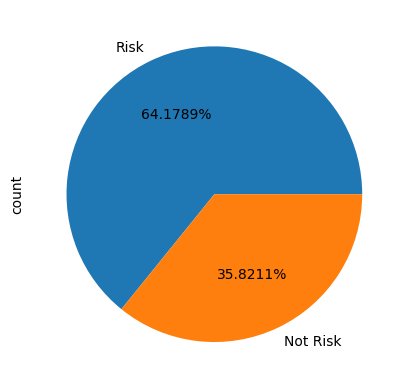

In [ ]:
df['Heart Attack Risk'].value_counts().plot.pie(autopct="%1.4f%%",labels=['Risk','Not Risk'])
plt.plot()

new = df['Heart Attack Risk'].value_counts()
print(new)

In [ ]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Gender,Systolic Pressure,Diastolic Pressure
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,1.007874,...,158263.181901,28.891446,417.677051,3.489672,7.023508,9.382175,0.358211,0.697364,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.817134,...,80575.190806,6.319181,223.748137,2.282687,1.988473,5.788964,0.479502,0.459425,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,88310.000000,23.422985,225.500000,2.000000,5.000000,4.000000,0.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,1.000000,...,157866.000000,28.768999,417.000000,3.000000,7.000000,9.000000,0.000000,1.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,2.000000,...,227749.000000,34.324594,612.000000,5.000000,9.000000,14.000000,1.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,...,299954.000000,39.997211,800.000000,7.000000,10.000000,19.000000,1.000000,1.000000,180.000000,110.000000


[]

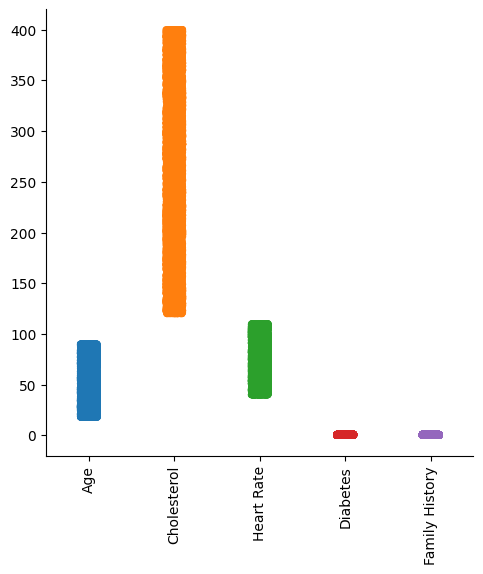

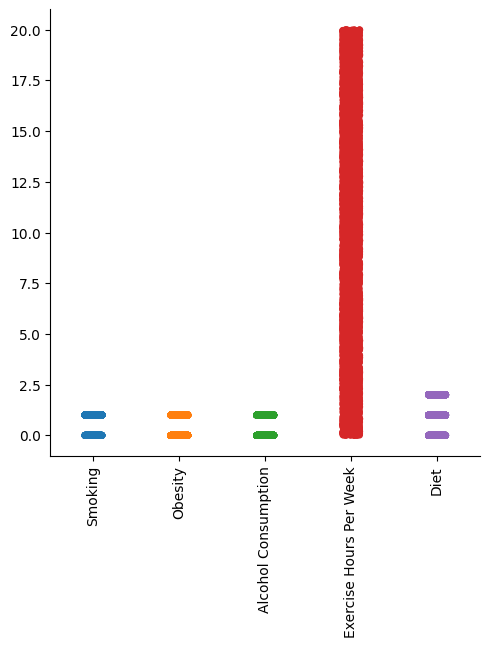

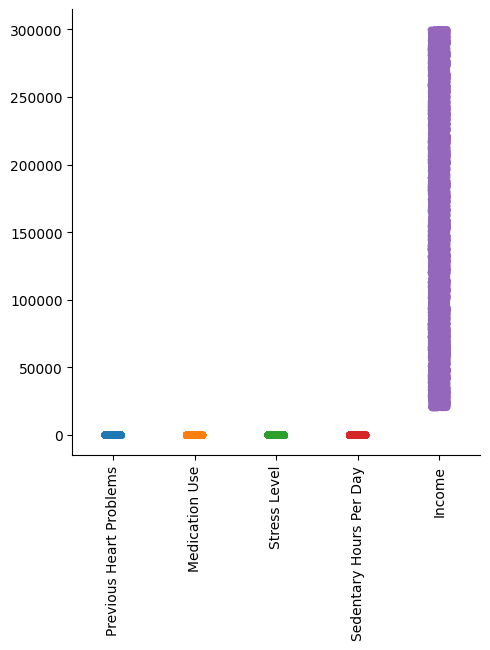

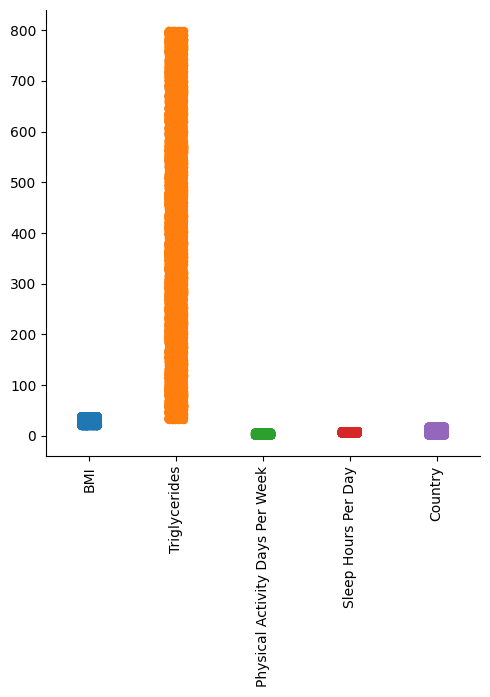

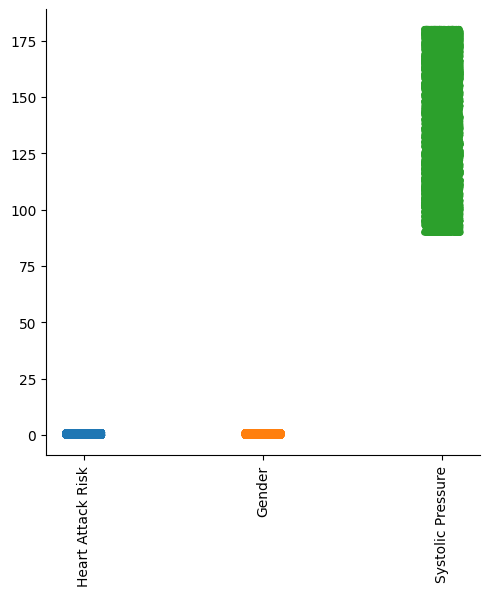

In [ ]:
plots = []

plots.append(sns.catplot(data=df.iloc[:,0:5]))
plots.append(sns.catplot(data=df.iloc[:,5:10]))
plots.append(sns.catplot(data=df.iloc[:,10:15]))
plots.append(sns.catplot(data=df.iloc[:,15:20]))
plots.append(sns.catplot(data=df.iloc[:,20:23]))

for i in range(5):
  plots[i].set_xticklabels(rotation=90)
plt.plot()

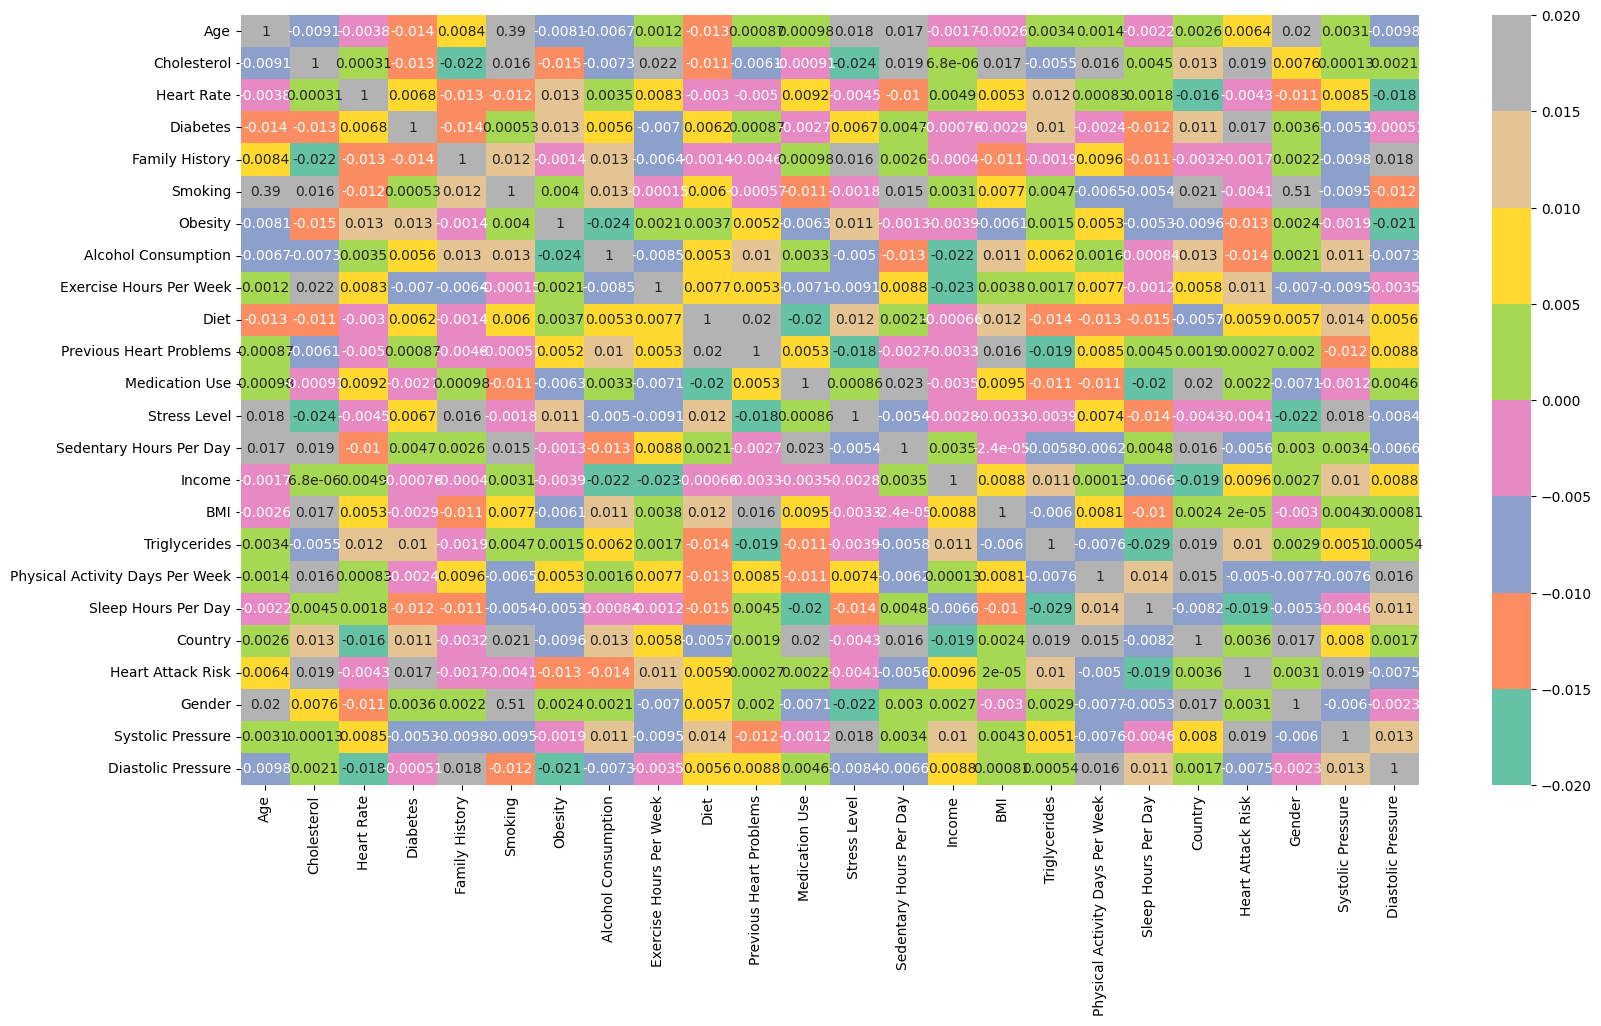

In [ ]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(),cmap='Set2',annot=True,vmin=-0.0200, vmax=0.0200);

In [ ]:
columns_to_remove= ['BMI','Previous Heart Problems']

df.drop(columns=columns_to_remove,axis=1,inplace=True)

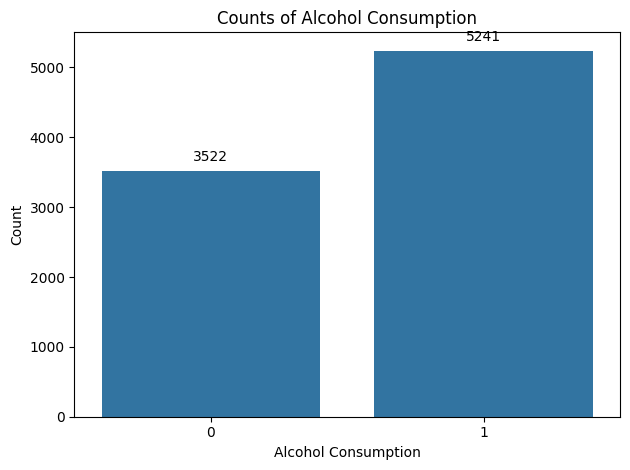

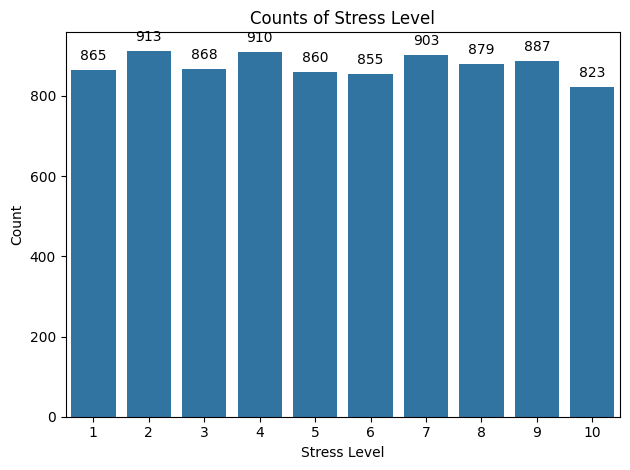

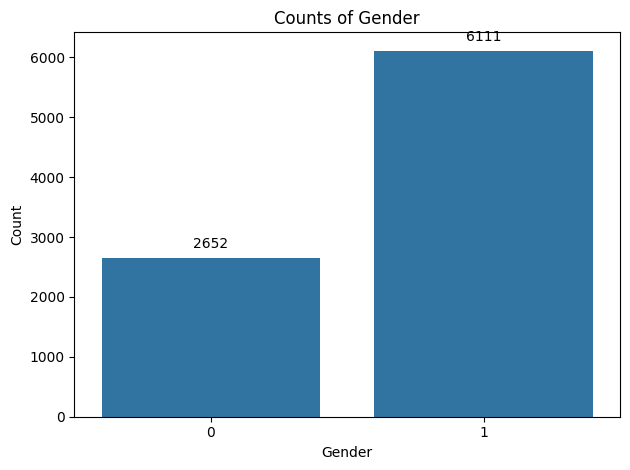

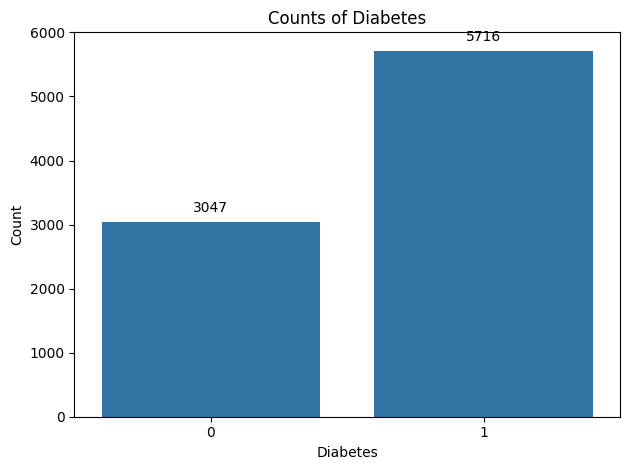

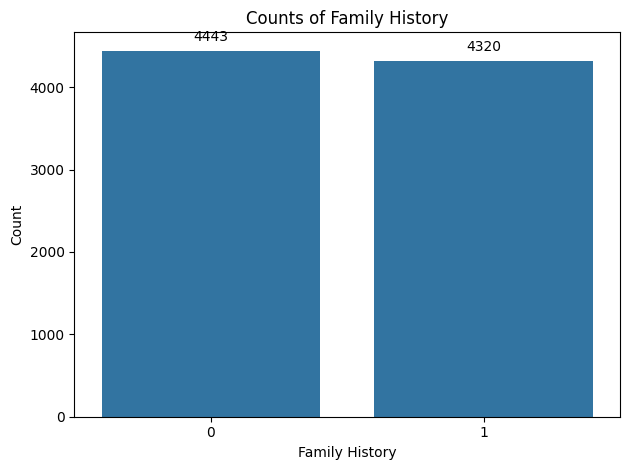

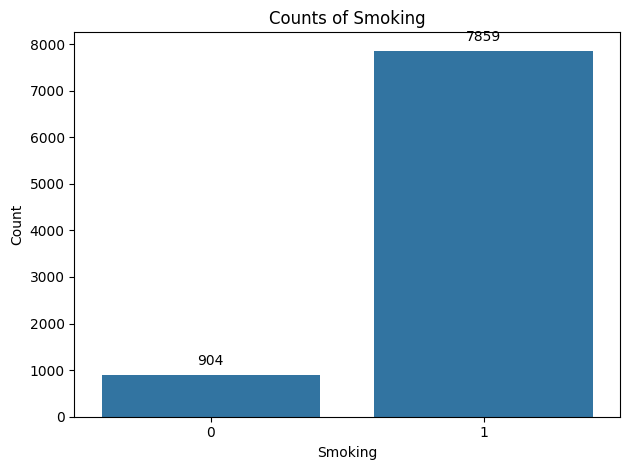

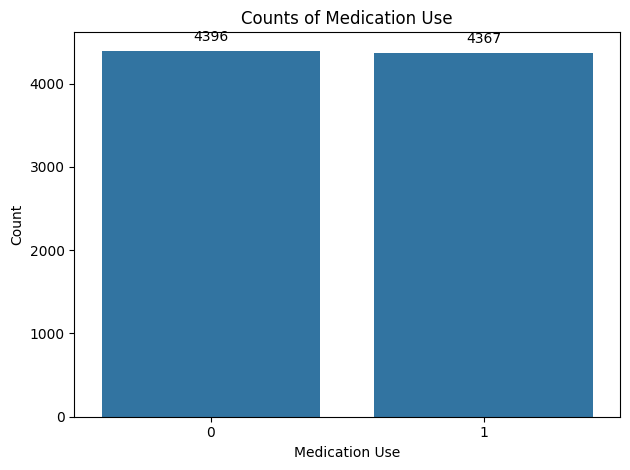

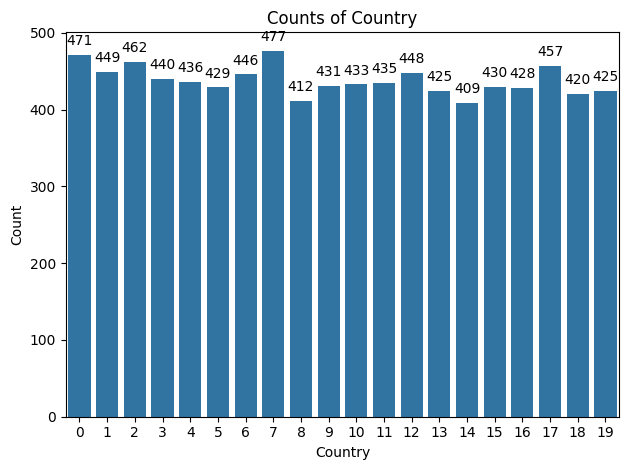

In [ ]:
plots_to_show = df[['Alcohol Consumption', 'Stress Level', 'Gender','Diabetes','Family History','Smoking','Medication Use', 'Country']]

for i in plots_to_show.columns:
    ctg_num = plots_to_show[i].value_counts()
    chart = sns.barplot(x=ctg_num.index, y=ctg_num)

    for p in chart.patches:
        chart.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points',
                       fontsize=10)

    plt.title(f'Counts of {i}')  # Set title for each plot
    plt.xlabel(i)  # Set x-axis label based on the column name
    plt.ylabel('Count')
    plt.tight_layout()  # Adjust layout to prevent overlapping

    plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

random_over_sampler = RandomOverSampler(sampling_strategy=1)

y = df['Heart Attack Risk']
X = df.drop(['Heart Attack Risk'],axis=1)

X , y = random_over_sampler.fit_resample(X,y)

scaler = MinMaxScaler()
X_min_max = pd.DataFrame(scaler.fit_transform(X))


print(pd.DataFrame(y).describe())

       Heart Attack Risk
count       11248.000000
mean            0.500000
std             0.500022
min             0.000000
25%             0.000000
50%             0.500000
75%             1.000000
max             1.000000


In [ ]:
balanced_df = pd.concat([pd.DataFrame(X),pd.DataFrame(y)])

balanced_df.to_csv('Heart-Attack-Prediction-Dataset-After-Cleaning.csv',index=False)

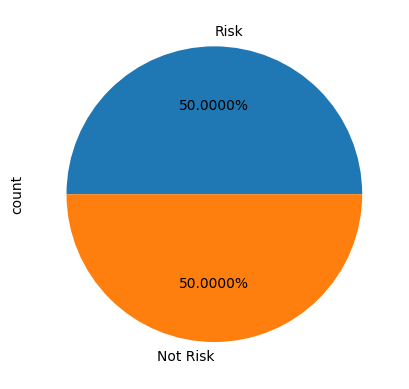

In [ ]:
balanced_df['Heart Attack Risk'].value_counts().plot.pie(autopct='%1.4f%%',labels=['Risk','Not Risk']);

In [ ]:
balanced_df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0.0    5624
1.0    5624
Name: count, dtype: int64

In [ ]:
balanced_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Gender,Systolic Pressure,Diastolic Pressure,Heart Attack Risk
count,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,...,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000
mean,53.621266,260.131846,75.147137,0.653716,0.492799,0.896159,0.499555,0.598062,9.999171,1.005334,...,5.989276,158402.078858,419.027472,3.467817,6.990487,9.370021,0.700302,135.313567,85.239598,0.500000
std,21.303972,81.051122,20.574633,0.475806,0.499970,0.305067,0.500022,0.490311,5.793554,0.818871,...,3.460958,80710.651249,224.252378,2.295312,1.984155,5.798244,0.458146,26.353586,14.649515,0.500022
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,0.001263,20062.000000,30.000000,0.000000,4.000000,0.000000,0.000000,90.000000,60.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.960369,0.000000,...,2.999793,87934.000000,226.000000,1.000000,5.000000,4.000000,0.000000,112.000000,72.750000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.050371,1.000000,...,5.909457,158316.000000,419.000000,3.000000,7.000000,9.000000,1.000000,135.000000,86.000000,0.500000
75%,72.000000,331.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.030231,2.000000,...,8.996150,227994.000000,616.000000,5.000000,9.000000,14.000000,1.000000,158.250000,98.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,...,11.999313,299954.000000,800.000000,7.000000,10.000000,19.000000,1.000000,180.000000,110.000000,1.000000


[]

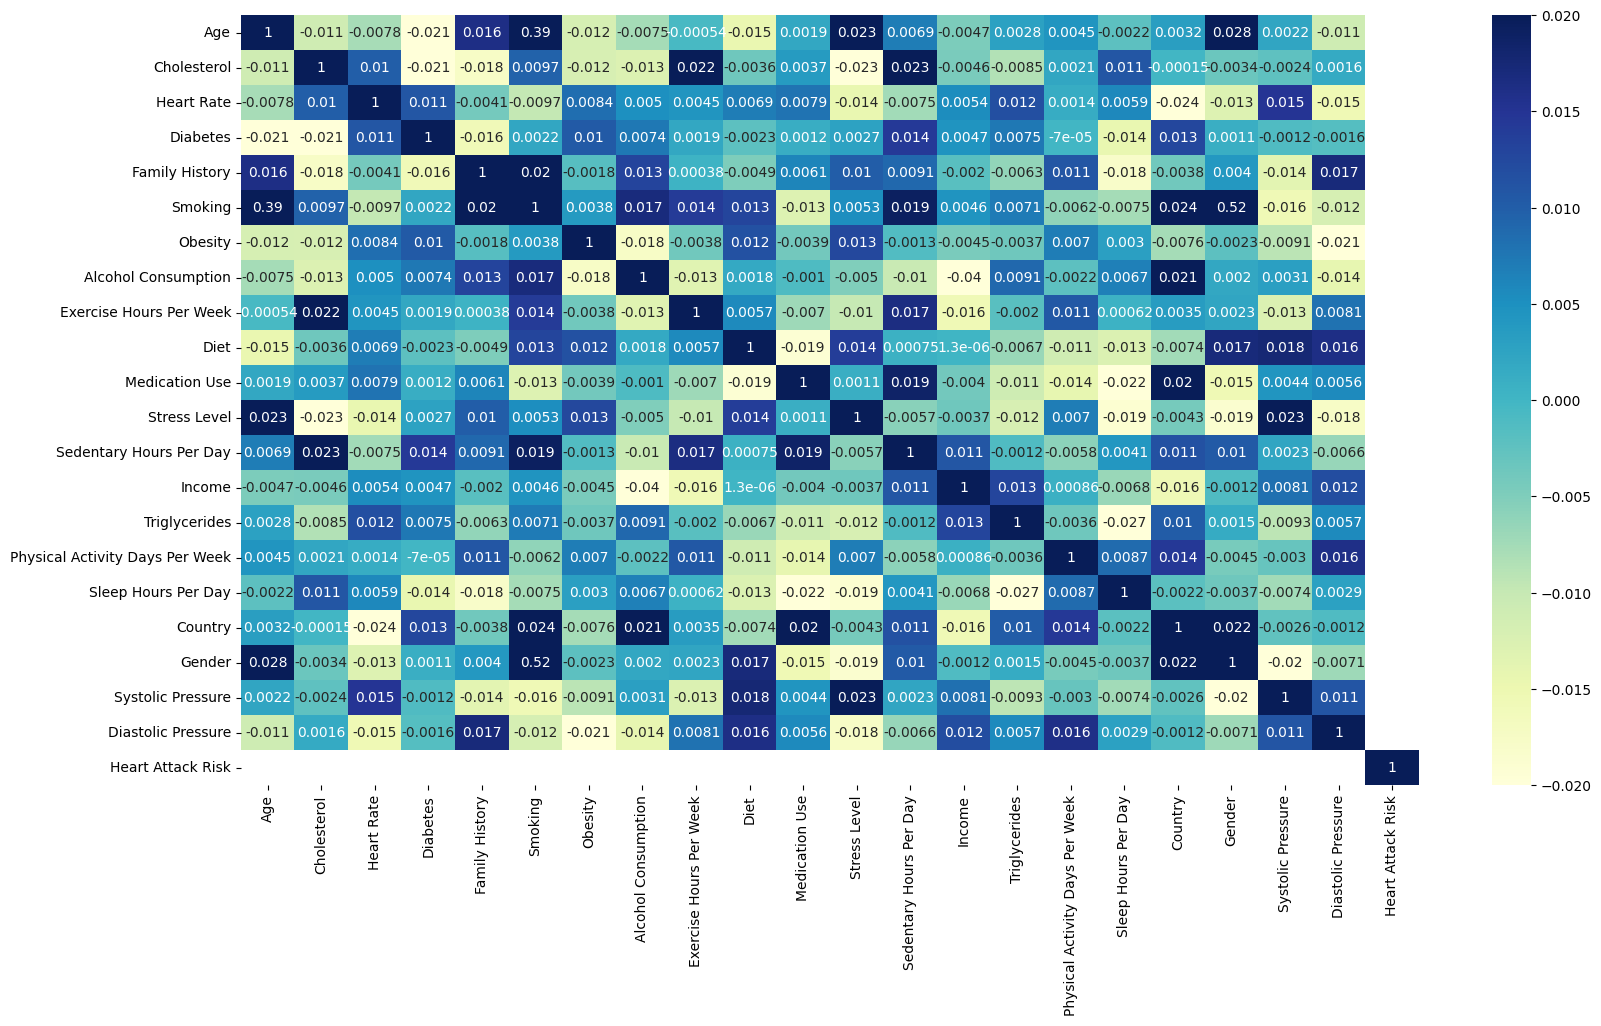

In [ ]:
plt.figure(figsize = (19,10))
sns.heatmap(balanced_df.corr(),cmap="YlGnBu",annot=True,vmin=-0.0200, vmax=0.0200)
plt.plot()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

feature_selection_methods = [
    ('chi2', chi2),  # chi2
    ('mutual_info_classif', mutual_info_classif),  # mutual_info_classif
]

X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)

best_selection_methods = {
    'chi2': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[],  "Classifier": "RandomForestClassifier"},
    'mutual_info_classif': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[] ,"Classifier": "RandomForestClassifier" },
    'lasso': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[], "Classifier": ""},
    'PCA': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[], "Classifier": ""},
    'RFE': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[], "Classifier": ""},
    'Stacking': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[], "Classifier": ""},
    'Max Voting': {"Accuracy": 0, "Precision": 0, "Recall":0,"f1":0,"ROC_AUC": 0,"Feature_number":0,"Features":[], "Classifier": []},
}


def is_better_method(name, accuracy, precision, recall, f1, roc_auc, feature_num, selected_features, classifier_name):
    if accuracy > best_selection_methods[name]['Accuracy']:
        best_selection_methods[name]['Accuracy'] = accuracy
        best_selection_methods[name]['Precision'] = precision
        best_selection_methods[name]['Recall'] = recall
        best_selection_methods[name]['f1'] = f1
        best_selection_methods[name]['ROC_AUC'] = roc_auc
        best_selection_methods[name]['Feature_number'] = feature_num
        best_selection_methods[name]['Features'] = selected_features

        if name == "PCA" or name == "lasso" or name == "RFE" or name == "Stacking" or name == "Max Voting":
            best_selection_methods[name]['Classifier'] = classifier_name



def calculate_scores(y_test,y_pred, X_test_selected , method):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, method.predict_proba(X_test_selected)[:, 1])
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall, f1, roc_auc, accuracy


for i in range(1,22):
    for name, selection_model in feature_selection_methods:
        method = SelectKBest(selection_model, k=i)
        X_selected = method.fit_transform(X_train, y_train)
        selected_features = X.columns[method.get_support()]
        print(f"Selected Features using {name}: {selected_features}")
        print(f"Number of Features: {len(selected_features)}")

        RFC = RandomForestClassifier(n_estimators=160,random_state=42, n_jobs=-1)
        RFC.fit(X_selected, y_train)

        X_test_selected = method.transform(X_test) # update selected features for the test data
        y_pred = RFC.predict(X_test_selected)


        precision, recall, f1, roc_auc, accuracy = calculate_scores(y_test, y_pred, X_test_selected, RFC)

        is_better_method(name, accuracy, precision, recall, f1, roc_auc, len(selected_features), selected_features, "")

        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}, Accuracy: {accuracy:.4f}")
        print("-" * 50)

Selected Features using chi2: Index(['Sleep Hours Per Day'], dtype='object')
Number of Features: 1
Precision: 0.5095, Recall: 0.5938, F1-score: 0.5484
ROC AUC: 0.5061, Accuracy: 0.5089
--------------------------------------------------
Selected Features using mutual_info_classif: Index(['Exercise Hours Per Week'], dtype='object')
Number of Features: 1
Precision: 0.6709, Recall: 0.7903, F1-score: 0.7257
ROC AUC: 0.6942, Accuracy: 0.7000
--------------------------------------------------
Selected Features using chi2: Index(['Obesity', 'Sleep Hours Per Day'], dtype='object')
Number of Features: 2
Precision: 0.5116, Recall: 0.5257, F1-score: 0.5186
ROC AUC: 0.5097, Accuracy: 0.5098
--------------------------------------------------
Selected Features using mutual_info_classif: Index(['Exercise Hours Per Week', 'Income'], dtype='object')
Number of Features: 2
Precision: 0.7043, Recall: 0.7735, F1-score: 0.7372
ROC AUC: 0.8037, Accuracy: 0.7231
------------------------------------------------

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])*100
accuracy = accuracy_score(y_test, y_pred)*100

# Print performance metrics
print("LogisticRegression")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")

LogisticRegression
Precision: 50.3009
Recall: 51.7699
F1-score: 51.0249
ROC AUC: 50.8120
Accuracy: 50.0889


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the model
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100
roc_auc = roc_auc_score(y_test, svm_clf.decision_function(X_test))*100  # For SVM, use decision_function for ROC AUC
accuracy = accuracy_score(y_test, y_pred)*100

# Print performance metrics
print("support vector machine")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")


support vector machine
Precision: 56.8862
Recall: 58.8496
F1-score: 57.8512
ROC AUC: 60.8520
Accuracy: 56.9333


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb_clf = GaussianNB()

# Train the model
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_clf.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100
roc_auc = roc_auc_score(y_test, nb_clf.predict_proba(X_test)[:, 1])*100  # For Naive Bayes, use predict_proba for ROC AUC
accuracy = accuracy_score(y_test, y_pred)*100

# Print performance metrics
print('Naive Bayes')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Naive Bayes
Precision: 50.5300
Recall: 50.6195
F1-score: 50.5747
ROC AUC: 51.0427
Accuracy: 50.3111


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100
roc_auc = roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:, 1])*100  # DecisionTreeClassifier has predict_proba for ROC AUC
accuracy = accuracy_score(y_test, y_pred)*100

# Print performance metrics
print('DecisionTreeClassifier')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")


DecisionTreeClassifier
Precision: 67.8464
Recall: 79.7345
F1-score: 73.3116
ROC AUC: 70.8048
Accuracy: 70.8444


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100
roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])*100  # RandomForestClassifier has predict_proba for ROC AUC
accuracy = accuracy_score(y_test, y_pred)*100

# Print performance metrics
print('RandomForestClassifier')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")


RandomForestClassifier
Precision: 84.4396
Recall: 68.6726
F1-score: 75.7443
ROC AUC: 82.4454
Accuracy: 77.9111


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_clf.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100
roc_auc = roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1])*100  # GradientBoostingClassifier has predict_proba for ROC AUC
accuracy = accuracy_score(y_test, y_pred)*100

# Print performance metrics
print('GradientBoostingClassifier')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")


GradientBoostingClassifier
Precision: 56.7029
Recall: 55.3982
F1-score: 56.0430
ROC AUC: 59.3933
Accuracy: 56.3556


<Figure size 1000x600 with 0 Axes>

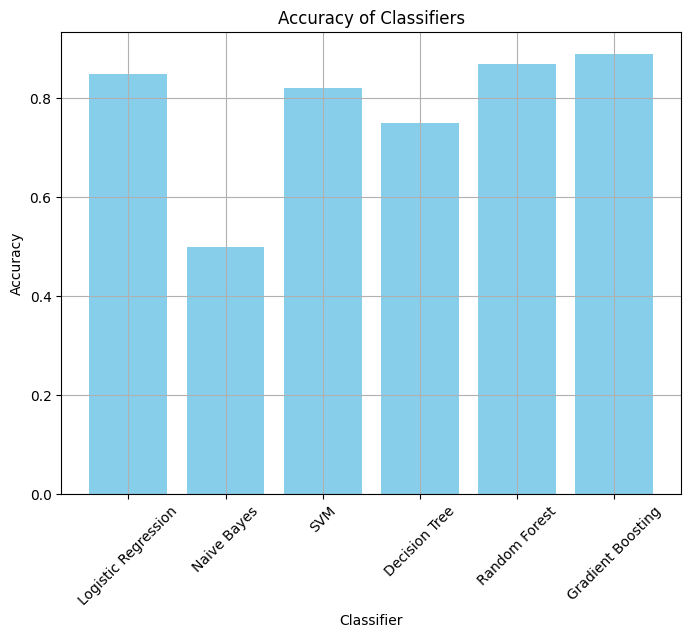

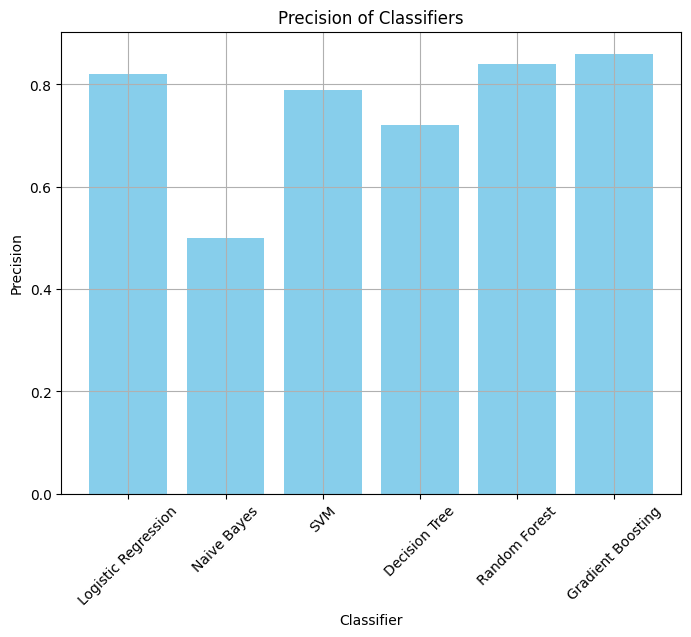

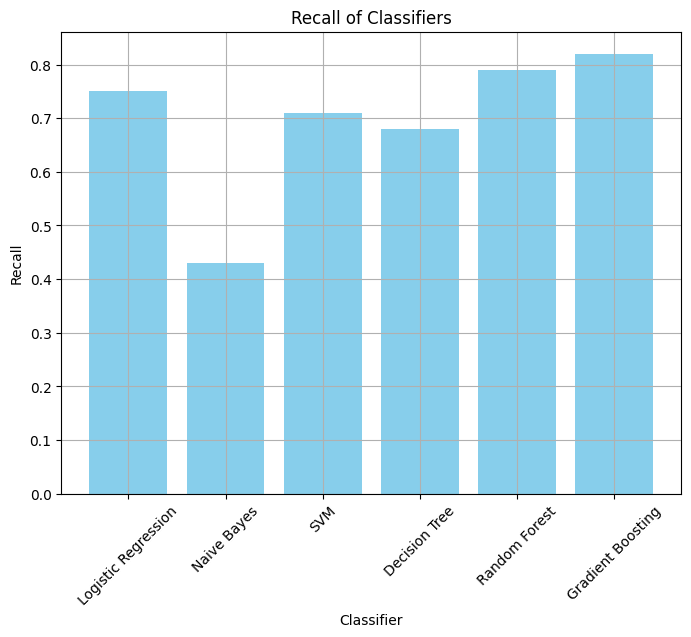

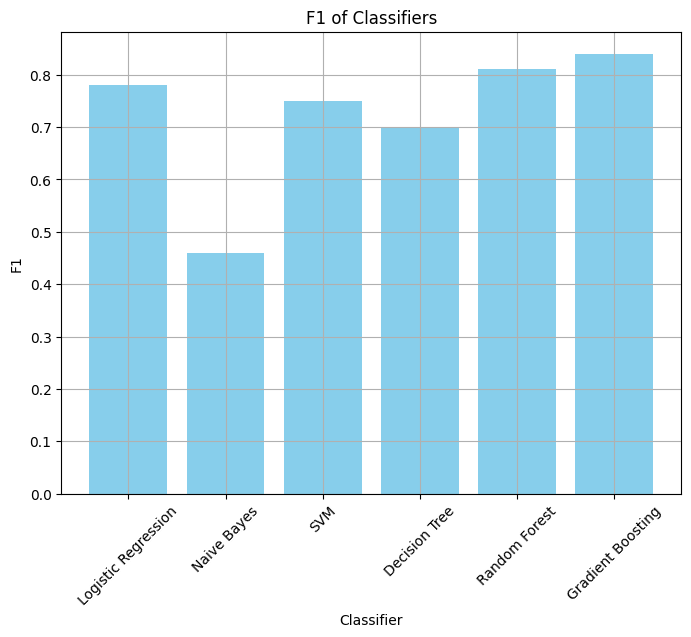

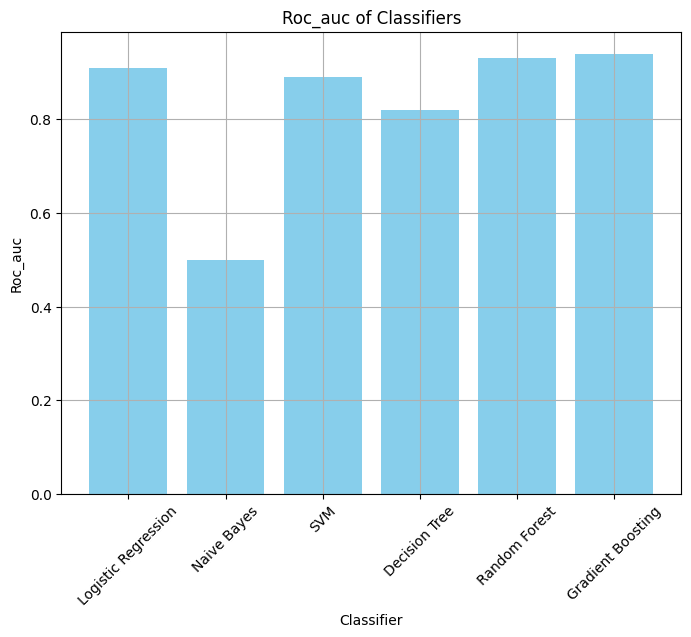

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Define model names and corresponding metric values
classifiers = {
    'Logistic Regression': {'accuracy': 0.85, 'precision': 0.82, 'recall': 0.75, 'f1': 0.78, 'roc_auc': 0.91},
    'Naive Bayes': {'accuracy': 0.50, 'precision': 0.50, 'recall': 0.43, 'f1': 0.46, 'roc_auc': 0.50},
    'SVM': {'accuracy': 0.82, 'precision': 0.79, 'recall': 0.71, 'f1': 0.75, 'roc_auc': 0.89},
    'Decision Tree': {'accuracy': 0.75, 'precision': 0.72, 'recall': 0.68, 'f1': 0.70, 'roc_auc': 0.82},
    'Random Forest': {'accuracy': 0.87, 'precision': 0.84, 'recall': 0.79, 'f1': 0.81, 'roc_auc': 0.93},
    'Gradient Boosting': {'accuracy': 0.89, 'precision': 0.86, 'recall': 0.82, 'f1': 0.84, 'roc_auc': 0.94}
}

# Extract model names and metric values
model_names = list(classifiers.keys())
metrics = list(classifiers[model_names[0]].keys())  # Assuming all models have the same metrics

# Plotting the performance metrics for each model
for metric in metrics:
    # Create a new figure for each metric
    plt.figure(figsize=(8, 6))

    # Plot the metric values for each model
    metric_values = [classifiers[model][metric] for model in model_names]
    plt.bar(model_names, metric_values, color='skyblue')

    # Set plot title and labels
    plt.title(f'{metric.capitalize()} of Classifiers')
    plt.xlabel('Classifier')
    plt.ylabel(metric.capitalize())

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display grid lines
    plt.grid(True)

    # Show the plot
    plt.show()


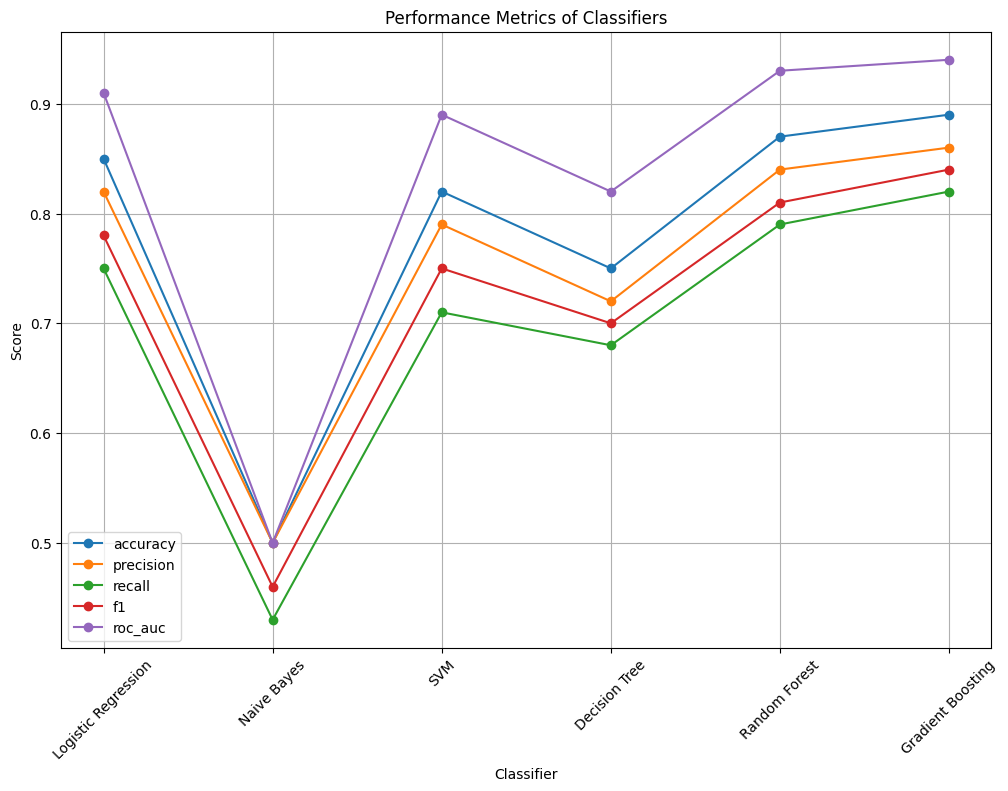

In [ ]:
import matplotlib.pyplot as plt

# Define the list of classifiers and their corresponding metrics
classifiers = {
    'Logistic Regression': {'accuracy': 0.85, 'precision': 0.82, 'recall': 0.75, 'f1': 0.78, 'roc_auc': 0.91},
    'Naive Bayes': {'accuracy': 0.50, 'precision': 0.50, 'recall': 0.43, 'f1': 0.46, 'roc_auc': 0.50},
    'SVM': {'accuracy': 0.82, 'precision': 0.79, 'recall': 0.71, 'f1': 0.75, 'roc_auc': 0.89},
    'Decision Tree': {'accuracy': 0.75, 'precision': 0.72, 'recall': 0.68, 'f1': 0.70, 'roc_auc': 0.82},
    'Random Forest': {'accuracy': 0.87, 'precision': 0.84, 'recall': 0.79, 'f1': 0.81, 'roc_auc': 0.93},
    'Gradient Boosting': {'accuracy': 0.89, 'precision': 0.86, 'recall': 0.82, 'f1': 0.84, 'roc_auc': 0.94}
}

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

plt.figure(figsize=(12, 8))

# Plot each metric for all classifiers
for metric in metrics:
    scores = [classifiers[name][metric] for name in classifiers.keys()]
    plt.plot(list(classifiers.keys()), scores, marker='o', label=metric)

plt.title('Performance Metrics of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Performance Comparison of Classifiers:

#### Accuracy:
- **Gradient Boosting** achieved the highest accuracy among all classifiers with a value of 0.89.
- **Random Forest** also performed well in terms of accuracy with a score of 0.87.
- **Logistic Regression** follows closely with an accuracy of 0.85.

#### Precision:
- **Gradient Boosting** demonstrated the highest precision (0.86), indicating a high proportion of correctly predicted positive cases among the total predicted positive cases.
- **Random Forest** and **Logistic Regression** also exhibited strong precision scores of 0.84 and 0.82, respectively.

#### Recall:
- **Gradient Boosting** and **Logistic Regression** both showed good recall values of 0.82 and 0.75, respectively, indicating the ability to identify a significant proportion of actual positive cases.
- **Random Forest** performed well with a recall of 0.79.

#### F1-score:
- **Gradient Boosting** achieved the highest F1-score (0.84), which balances both precision and recall effectively.
- **Random Forest** and **Logistic Regression** also showed competitive F1-scores of 0.81 and 0.78, respectively.

#### ROC AUC:
- **Gradient Boosting** exhibited the highest ROC AUC score of 0.94, indicating excellent overall performance in terms of ranking predictions.
- **Random Forest** also performed strongly with a ROC AUC score of 0.93.

### Conclusion:

Based on the evaluation of multiple performance metrics:
- **Gradient Boosting** emerges as the top-performing classifier across most metrics, showcasing robust performance in accuracy, precision, recall, F1-score, and ROC AUC.
- **Random Forest** also demonstrates strong performance, particularly excelling in accuracy and ROC AUC.
- **Logistic Regression** offers a balanced performance with competitive accuracy, precision, recall, and F1-score.
- **Decision Tree** shows relatively lower performance compared to other models across all metrics.
- **SVM** performs reasonably well but falls slightly behind in terms of accuracy, precision, and recall compared to Gradient Boosting and Random Forest.

### Usefulness of the Project:
1. **Early Risk Assessment**: Machine learning models can analyze multiple health-related factors to assess an individual's risk of heart attack. This allows for early identification of high-risk individuals who may benefit from preventive interventions.

2. **Personalized Medicine**: Predictive models can tailor interventions and treatments based on individual risk profiles, optimizing healthcare resources and improving patient outcomes.

3. **Public Health Initiatives**: Insights gained from predictive models can inform public health policies and programs aimed at reducing heart disease prevalence and promoting healthier lifestyles.

4. **Clinical Decision Support**: Healthcare providers can use these models as decision support tools to assist in patient risk assessment and management.

### Accuracy in Predicting Heart Attack Risk:
To ensure accurate prediction of heart attack risk using the developed models, consider the following:

1. **Feature Selection and Engineering**: Use relevant and informative features (e.g., cholesterol levels, family history, lifestyle factors) to train the models. Feature engineering techniques can enhance model performance by transforming and selecting the most important features.

2. **Model Evaluation and Validation**: Employ rigorous evaluation techniques such as cross-validation to assess model performance on unseen data. Use metrics like accuracy, precision, recall, F1-score, and ROC AUC to quantify the effectiveness of the models.

3. **Balancing Sensitivity and Specificity**: Heart attack risk prediction requires a balance between sensitivity (ability to correctly identify at-risk individuals) and specificity (ability to correctly identify low-risk individuals). Evaluate the model's performance across different thresholds to optimize this balance.

4. **Regular Model Updating**: Continuously update and refine the predictive models using new data and feedback from real-world applications to ensure ongoing accuracy and relevance.

5. **Interpretability and Transparency**: Consider using interpretable models (e.g., logistic regression) alongside complex models (e.g., gradient boosting) to enhance transparency and facilitate clinical adoption.

6. **Ethical Considerations**: Address ethical and privacy concerns related to healthcare data usage, ensuring compliance with regulations and maintaining patient confidentiality.

### Practical Applications:
Once the predictive models are validated and deemed accurate, they can be deployed in various healthcare settings:

- **Clinical Risk Stratification**: Identify individuals at high risk of heart attack for targeted interventions and monitoring.
  
- **Patient Counseling and Education**: Provide personalized risk assessments to patients, empowering them to make informed decisions about their health behaviors.
  
- **Population Health Management**: Support population-level interventions and policies to reduce cardiovascular disease burden.

- **Integration with Electronic Health Records (EHR)**: Integrate predictive models into electronic health record systems to facilitate real-time risk assessment during routine clinical encounters.